<a href="https://colab.research.google.com/github/meutia-kumaheri/python-club-analysis-2025/blob/main/Week5_python_club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load and clean the data
file_path = ('/content/drive/MyDrive/VCCRI_python_club_2025/pneumonia_recovery_dataset.csv')
df = pd.read_csv( file_path )
df.rename(columns={'patient_id': 'subject_id'}, inplace=True)
df.drop_duplicates
median_bmi = df['bmi']. median()
df['bmi'] = df['bmi'].fillna(median_bmi)
df['sex'] = df['sex'].str.capitalize()
df['age'] = pd.to_numeric(df['age'])
print("Setup complete. Clean DataFrame 'df' is ready.")
df.head()

Setup complete. Clean DataFrame 'df' is ready.


,subject_id,age,sex,bmi,blood_pressure_systolic,hemoglobin_level,c_reactive_protein,treatment_group,days_to_recovery
0,P001,68,Male,29.3,145,13.1,120,A,14
1,P002,75,Female,24.1,160,11.9,155,B,18
2,P003,52,Male,33.5,130,15.2,80,A,10
3,P004,61,Female,21.9,135,12.5,110,B,12
4,P005,79,Male,26.8,155,11.5,200,B,21


In [ ]:
# Create a small , simple DataFrame for learning
mini_data = {
'Category': ['A', 'B', 'A', 'B', 'B'],
'Value': [60 , 50, 70, 80, 90]
}
mini_df = pd.DataFrame (mini_data)
print("Our mini dataset:")

Our mini dataset:


In [ ]:
grouped_object = mini_df.groupby('Category ')
print(grouped_object)

In [ ]:
group_a = grouped_object.get_group('A')
print(group_a)

  Category   Value 
0         A      60
2         A      70


In [ ]:
group_b = grouped_object.get_group('B')
print(group_b)

  Category   Value 
1         B      50
3         B      80
4         B      90


In [ ]:
grouped_mean = mini_df.groupby('Category')['Value'].mean()
print(grouped_mean)

Category
A    65.000000
B    73.333333
Name: Value, dtype: float64


In [ ]:
summary_stats = mini_df.groupby('Category')['Value'].agg(['mean','sum','count','std'])
print(summary_stats)

               mean  sum  count        std
Category                                  
A         65.000000  130      2   7.071068
B         73.333333  220      3  20.816660


In [ ]:
mini_df['Sex'] = ['M','F','F','M','M']
mini_df.head()
mini_df.groupby (['Category','Sex'])['Value'].mean()

Category  Sex
A         F      70.0
          M      60.0
B         F      50.0
          M      85.0
Name: Value, dtype: float64

In [ ]:
# most advanced groupby with multiple column and multiple functions
mini_df.groupby (['Category','Sex'])['Value'].agg(['mean','sum','count','std'])

mean  sum  count       std
Category Sex                            
A        F    70.0   70      1       NaN
         M    60.0   60      1       NaN
B        F    50.0   50      1       NaN
         M    85.0  170      2  7.071068

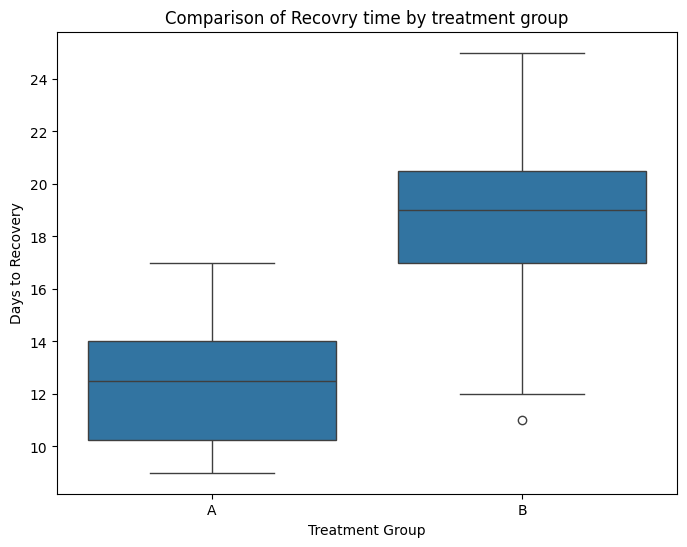

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='treatment_group', y='days_to_recovery')
#out NEW CHANGE = adding a more descriptive title
plt.title('Final analysis: Recovery time by treatment group')
plt.xlabel('Treatment Group')
plt.ylabel('Days to Recovery')
plt.show()

In [ ]:
df.groupby('treatment_group')['days_to_recovery'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment_group,,,,,,,,
A,10.0,12.500000,2.549510,9.0,10.25,12.5,14.0,17.0
B,11.0,18.454545,4.227615,11.0,17.00,19.0,20.5,25.0


In [ ]:
# next level of grouping by checking gender of each A and B
df.groupby(['treatment_group','sex'])['days_to_recovery'].mean()

treatment_group  sex   
A                Female    10.500000
                 Male      13.000000
B                Female    17.444444
                 Male      23.000000
Name: days_to_recovery, dtype: float64

In [ ]:
# p-value, need to install a package called statannotations
!pip install statannotations

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B: t-test independent samples, P_val:1.063e-03 t=-3.857e+00


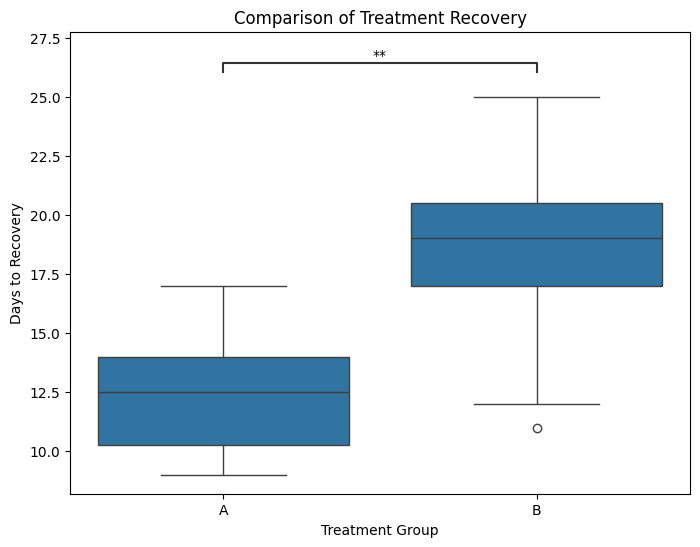

In [ ]:
from statannotations.Annotator import Annotator

plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df, x='treatment_group', y='days_to_recovery')
plt.title('Comparison of Treatment Recovery')
plt.xlabel('Treatment Group')
plt.ylabel('Days to Recovery')
box_pairs = [("A","B")]
annotator = Annotator(ax, box_pairs, data=df, x='treatment_group', y='days_to_recovery')
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()
plt.show()

In [ ]:
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 9.2 MB/s eta 0:00:00


In [ ]:
import docx
from docx.shared import Inches
from scipy.stats import ttest_ind
from statannotations.Annotator import Annotator

group_a = df[df['treatment_group']=='A']['days_to_recovery']
group_b = df[df['treatment_group']=='B']['days_to_recovery']

In [ ]:
# get t_stat from scipy.stats
# for p-value need 2 groups
t_stat, p_val = ttest_ind(group_a, group_b)
p_val

np.float64(0.001062584465493658)

In [ ]:
if p_val < 0.001:
  p_text = 'p<0.001'
else:
  p_text = f'p={p_val:.4f}'
print(p_text)

p=0.0011


In [ ]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df, x='treatment_group', y='days_to_recovery')
plt.title('Comparison of Treatment Recovery')
plt.xlabel('Treatment Group')
plt.ylabel('Days to Recovery')
box_pairs = [("A","B")]
annotator = Annotator(ax, box_pairs, data=df, x='treatment_group', y='days_to_recovery')
annotator.configure(test='t-test_ind', text_format='star', loc='inside', verbose=2)
annotator.apply_and_annotate()
plt.savefig('annotated_plot.png')
plt.close()
doc = docx.Document()
doc.add_heading('Pneunomia Recovery Study: Final Report',0)
doc.add_heading('Results', level=1)
doc.add_paragraph(
    f"A statistically significant differences in recovery time was "
    f"observed between the two treatment groups. Patients in the "
    f"experimental group (A) recovered significantly faster than "
    f"those in the standard group (B), as determined by "
    f"independent t-test ({p_text})"
)
doc.add_picture('annotated_plot.png', width=Inches(6.0))
doc.save("Final_Report_Dynamic.docx")

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

A vs. B: t-test independent samples, P_val:1.063e-03 t=-3.857e+00
